In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer

In [177]:
df=pd.read_csv('medical_examination.csv',index_col=[0])
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [178]:
df['age']=(df['age']/365).round(0)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [179]:
df['overweight']= (df['weight']/(df['height']/100)**2)>25 if 1 else 0
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,False
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,True
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,False
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,True
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,False


Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [180]:
df['cholesterol']= df['cholesterol'].replace({1:0,2:1,3:1})
df['cholesterol'].head()

id
0    0
1    1
2    1
3    0
4    0
Name: cholesterol, dtype: int64

In [181]:
df['gluc']= df['gluc'].replace({1:0,2:1,3:1})
df['gluc'].head()

id
0    0
1    0
2    0
3    0
4    0
Name: gluc, dtype: int64

Convert the data into long format and create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 

In [182]:
#transforming from wide to  long dataframe
df_2=pd.melt(df,id_vars='cardio',value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [183]:
df_3=df_2.groupby(['variable','value','cardio'])['cardio'].count()


In [184]:
df_3

variable     value  cardio
active       0      0          6378
                    1          7361
             1      0         28643
                    1         27618
alco         0      0         33080
                    1         33156
             1      0          1941
                    1          1823
cholesterol  0      0         29330
                    1         23055
             1      0          5691
                    1         11924
gluc         0      0         30894
                    1         28585
             1      0          4127
                    1          6394
overweight   0      0         15915
                    1         10539
             1      0         19106
                    1         24440
smoke        0      0         31781
                    1         32050
             1      0          3240
                    1          2929
Name: cardio, dtype: int64

In [185]:
df_cat = pd.DataFrame(df_2.groupby(['variable', 'value', 'cardio'])['value'].count()).rename(columns={'value': 'total'}).reset_index()

In [186]:
df_cat.head()

,variable,value,cardio,total
0,active,0,0,6378
1,active,0,1,7361
2,active,1,0,28643
3,active,1,1,27618
4,alco,0,0,33080


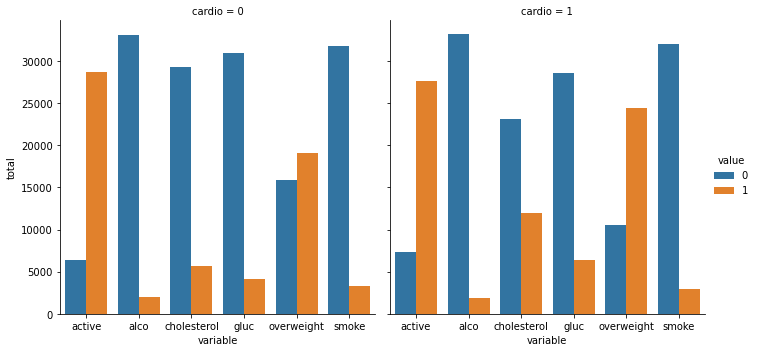

In [187]:
sns.catplot(x='variable',y='total',data=df_cat,col='cardio',hue='value',kind='bar')
plt.show()

Clean the data. Filter out the following patient segments that represent incorrect data:
* diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].  quantile(0.025)))
* height is more than the 97.5th percentile
* weight is less than the 2.5th percentile
* weight is more than the 97.5th percentile

In [188]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,50.0,2,168,62.0,110,80,0,0,0,0,1,0,False
1,55.0,1,156,85.0,140,90,1,0,0,0,1,1,True
2,52.0,1,165,64.0,130,70,1,0,0,0,0,1,False
3,48.0,2,169,82.0,150,100,0,0,0,0,1,1,True
4,48.0,1,156,56.0,100,60,0,0,0,0,0,0,False


In [189]:
df.shape

(70000, 13)

In [190]:
mask=df['ap_lo']<=df['ap_hi']
df=df[mask]
df.shape

(68766, 13)

In [191]:
mask_2=df['height']>=df['height'].quantile(0.025)
df=df[mask_2]
df.shape

(67260, 13)

In [192]:
mask_3=df['height']<=df['height'].quantile(0.975)
df=df[mask_3]
df.shape

(65859, 13)

In [193]:
mask_4=df['weight']>=df['weight'].quantile(0.025)
df=df[mask_4]
df.shape

(64384, 13)

In [194]:
mask_5=df['weight']<=df['weight'].quantile(0.975)
df=df[mask_5]
df.shape

(62784, 13)

<AxesSubplot:>

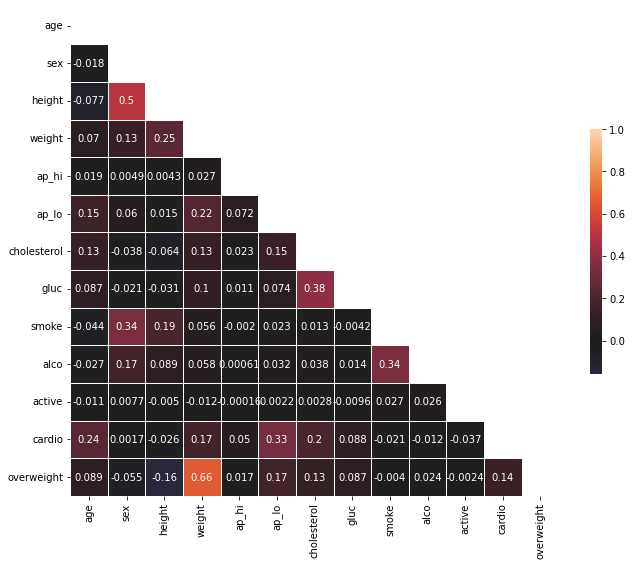

In [199]:
correlation=df.corr()
mask_6=np.triu(np.ones_like(correlation,dtype=bool))
f,ax=plt.subplots(figsize=(11,9))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(correlation,mask=mask_6,vmax=1,center=0,square=True,linewidths=.5,cbar_kws={"shrink":.5},annot=True)

<AxesSubplot:>

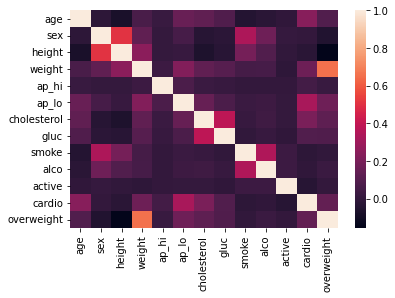

In [197]:
sns.heatmap(correlation)